<a href="https://colab.research.google.com/github/ravij25/gravity/blob/main/Inverse_wavelet_version6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/ravij25/gravity/main/kadapa2.csv")

In [3]:
df

Lat     Long  Bouger anomaly
0      78.0083  17.0032             4.6
1      78.0250  17.0032             3.0
2      78.0417  17.0032             1.4
3      78.0583  17.0032             0.1
4      78.0750  17.0032            -0.9
...        ...      ...             ...
22743  79.9417  14.0003           -32.5
22744  79.9583  14.0003           -32.4
22745  79.9750  14.0003           -32.6
22746  79.9917  14.0003           -33.4
22747  80.0083  14.0003           -35.1

[22748 rows x 3 columns]

In [4]:
# Extract the data as a numpy array
data = df['Bouger anomaly'].to_numpy()


In [5]:
# Define the filter parameters
nyquist_freq = 0.5 * len(data) / (df.index[-1] - df.index[0])
cutoff_freq = 0.02 * nyquist_freq
order = 4

In [6]:
# Design and apply the Butterworth low-pass filter
b, a = signal.butter(order, cutoff_freq / nyquist_freq, btype='low')
regional_anomaly = signal.filtfilt(b, a, data)

In [7]:
# Subtract the regional anomaly from the original data to obtain the residual anomaly
residual_anomaly = data - regional_anomaly

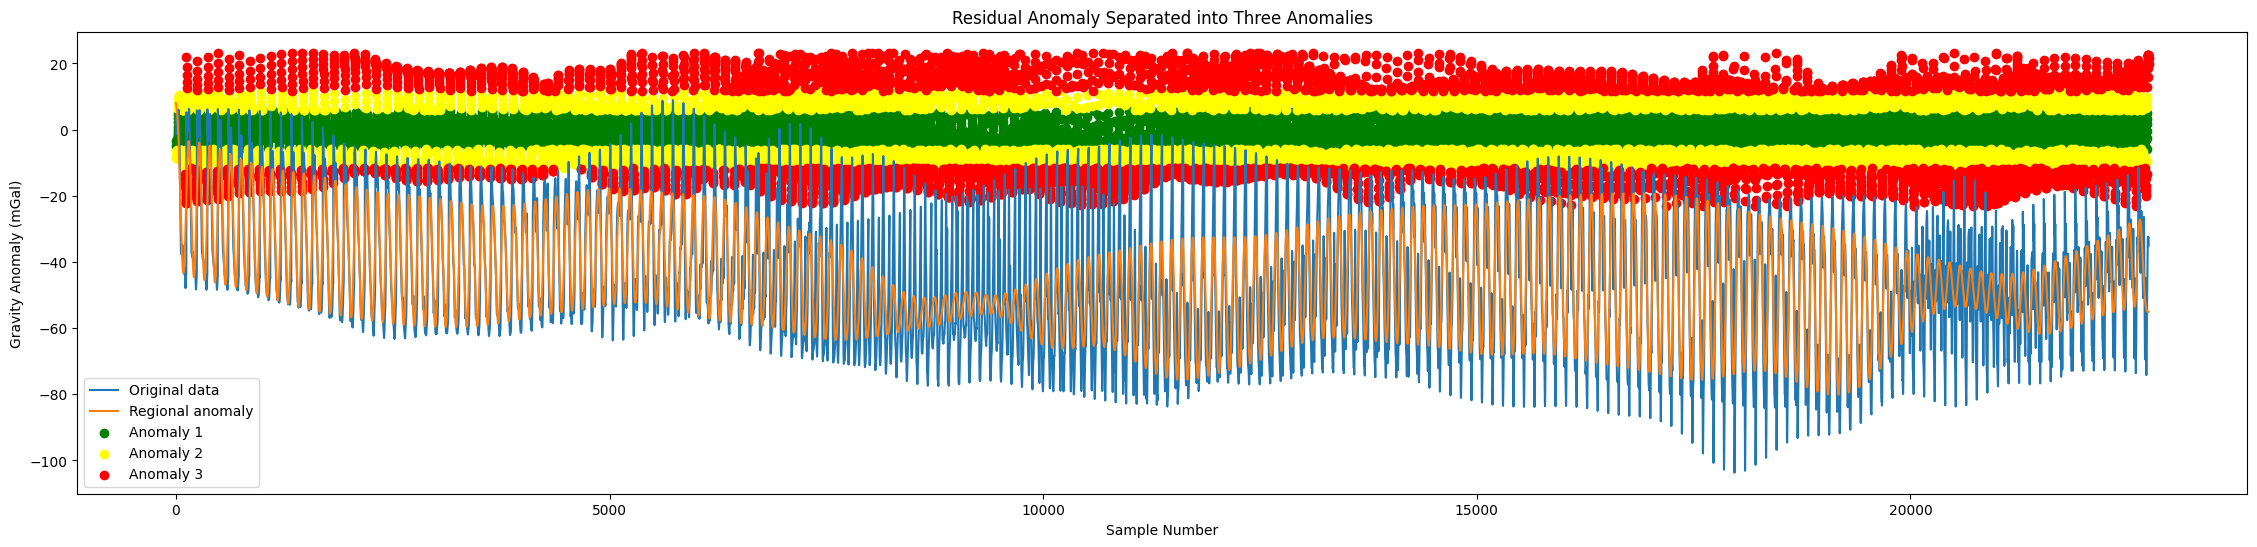

In [8]:
# Define three thresholds for the residual anomaly
threshold1 = residual_anomaly.std() / 2
threshold2 = residual_anomaly.std()
threshold3 = residual_anomaly.std() * 2

# Create three masks based on the thresholds
mask1 = (residual_anomaly >= -threshold1) & (residual_anomaly < threshold1)
mask2 = (residual_anomaly >= -threshold2) & (residual_anomaly < -threshold1) | \
        (residual_anomaly >= threshold1) & (residual_anomaly < threshold2)
mask3 = (residual_anomaly >= -threshold3) & (residual_anomaly < -threshold2) | \
        (residual_anomaly >= threshold2) & (residual_anomaly < threshold3)

# Create three separate arrays for the three anomalies
anomaly1 = np.where(mask1, residual_anomaly, np.nan)
anomaly2 = np.where(mask2, residual_anomaly, np.nan)
anomaly3 = np.where(mask3, residual_anomaly, np.nan)

# Plot the three anomalies with different colors
plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.plot(df.index, regional_anomaly, label='Regional anomaly')
plt.scatter(df.index, anomaly1, label='Anomaly 1', color='green')
plt.scatter(df.index, anomaly2, label='Anomaly 2', color='yellow')
plt.scatter(df.index, anomaly3, label='Anomaly 3', color='red')
plt.legend()
plt.title('Residual Anomaly Separated into Three Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()


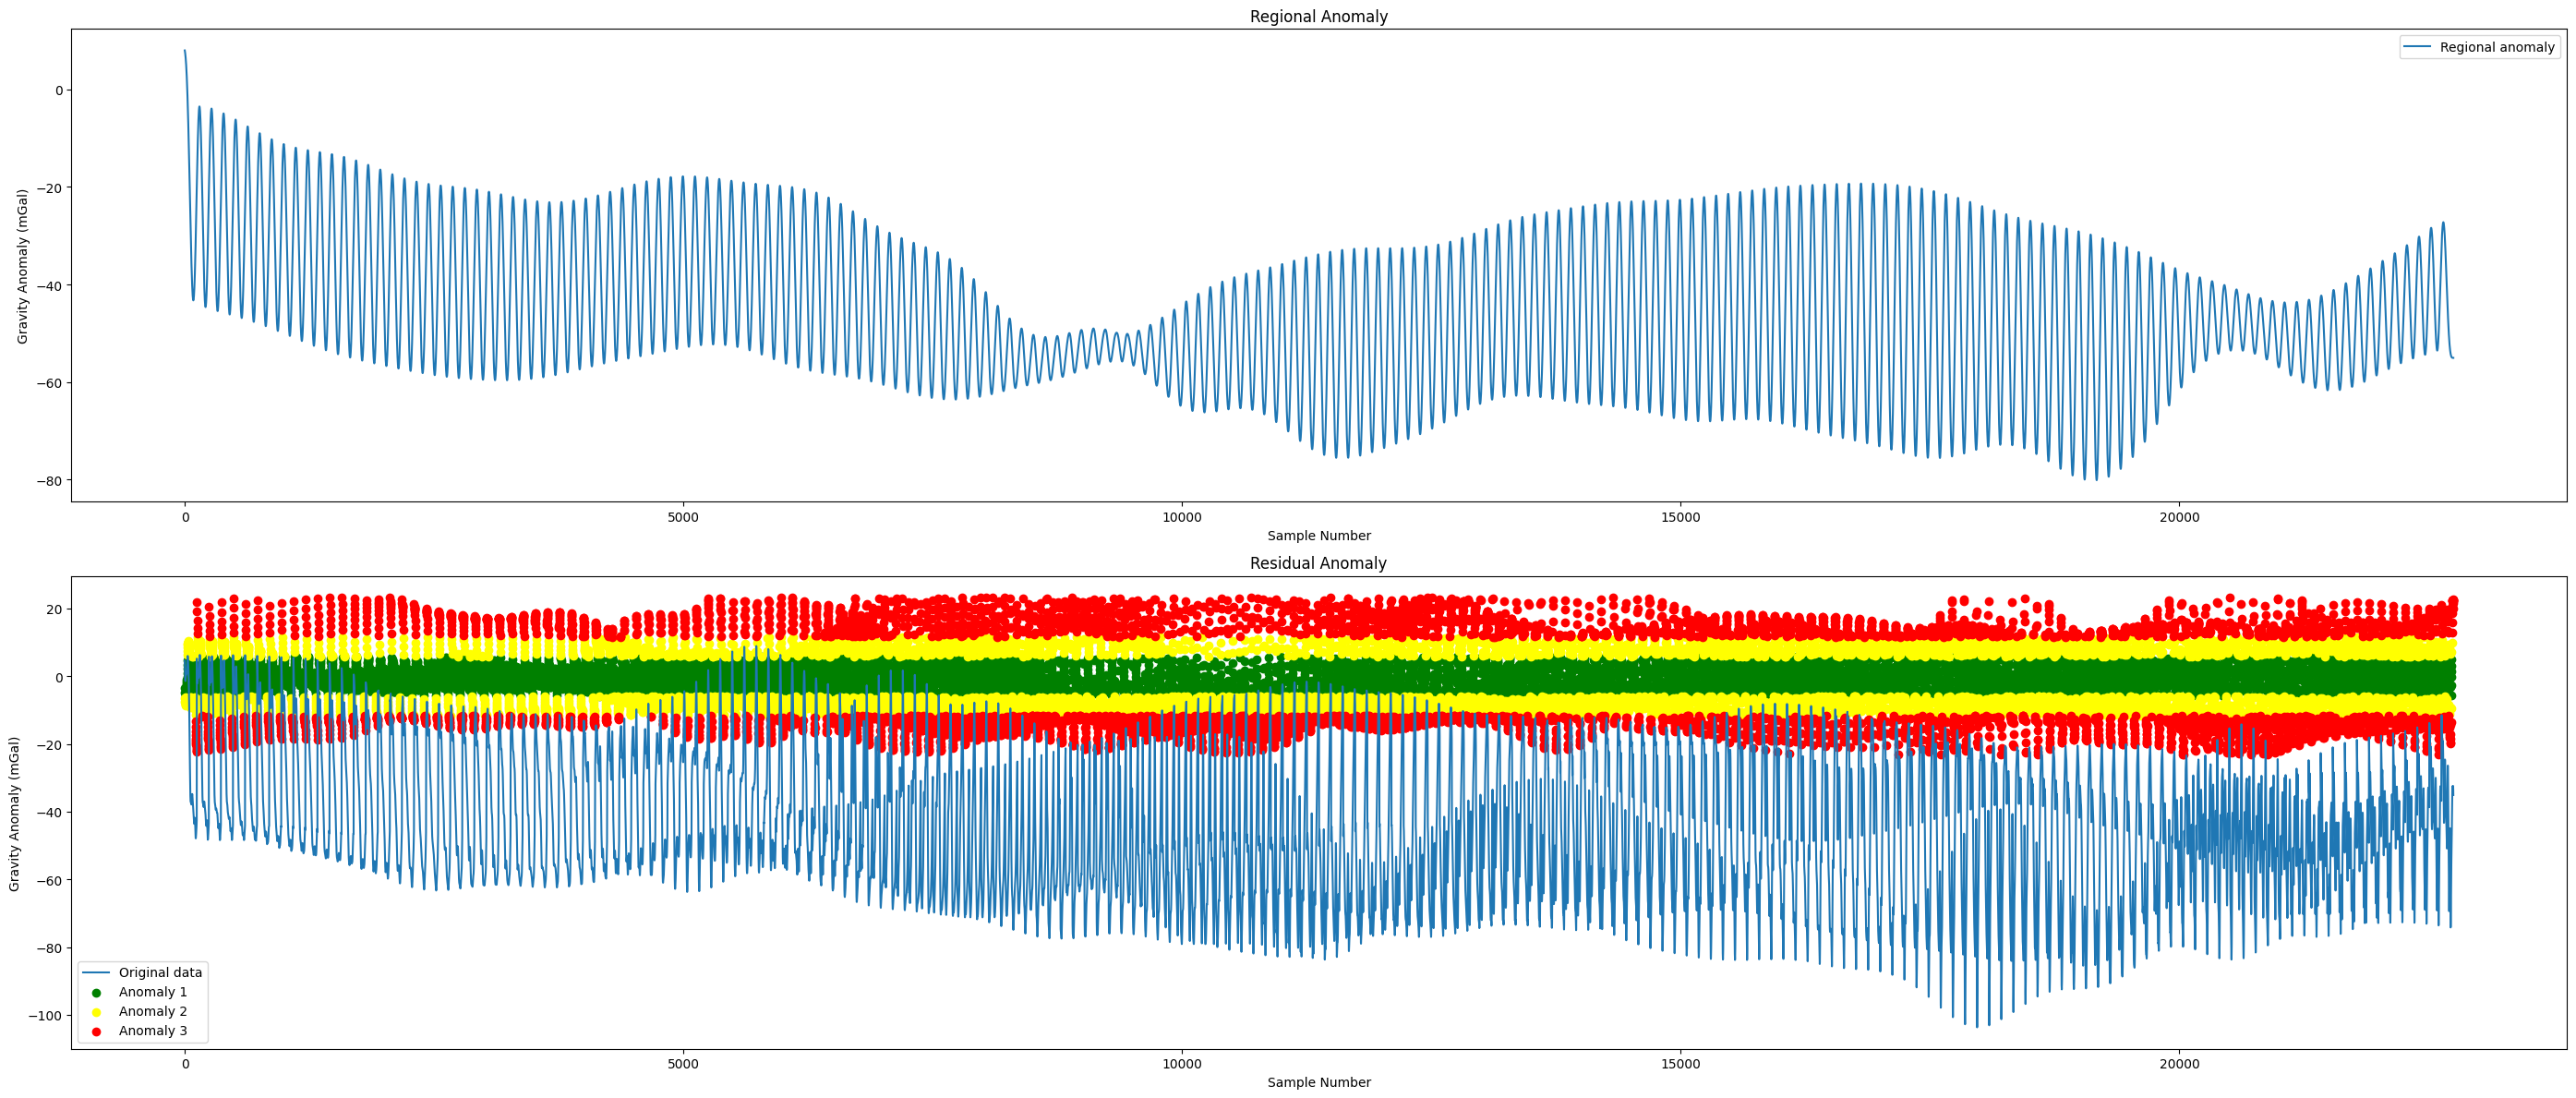

In [9]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(28, 12))

# Plot the regional anomaly in the first subplot
ax1.plot(df.index, regional_anomaly, label='Regional anomaly')
ax1.set_title('Regional Anomaly')
ax1.set_xlabel('Sample Number')
ax1.set_ylabel('Gravity Anomaly (mGal)')
ax1.legend()

# Plot the three anomalies in the residual anomaly subplot
ax2.plot(df.index, data, label='Original data')
ax2.scatter(df.index, anomaly1, label='Anomaly 1', color='green')
ax2.scatter(df.index, anomaly2, label='Anomaly 2', color='yellow')
ax2.scatter(df.index, anomaly3, label='Anomaly 3', color='red')
ax2.set_title('Residual Anomaly')
ax2.set_xlabel('Sample Number')
ax2.set_ylabel('Gravity Anomaly (mGal)')
ax2.legend()

# Adjust the layout of the subplots
fig.tight_layout()

# Show the figure
plt.show()


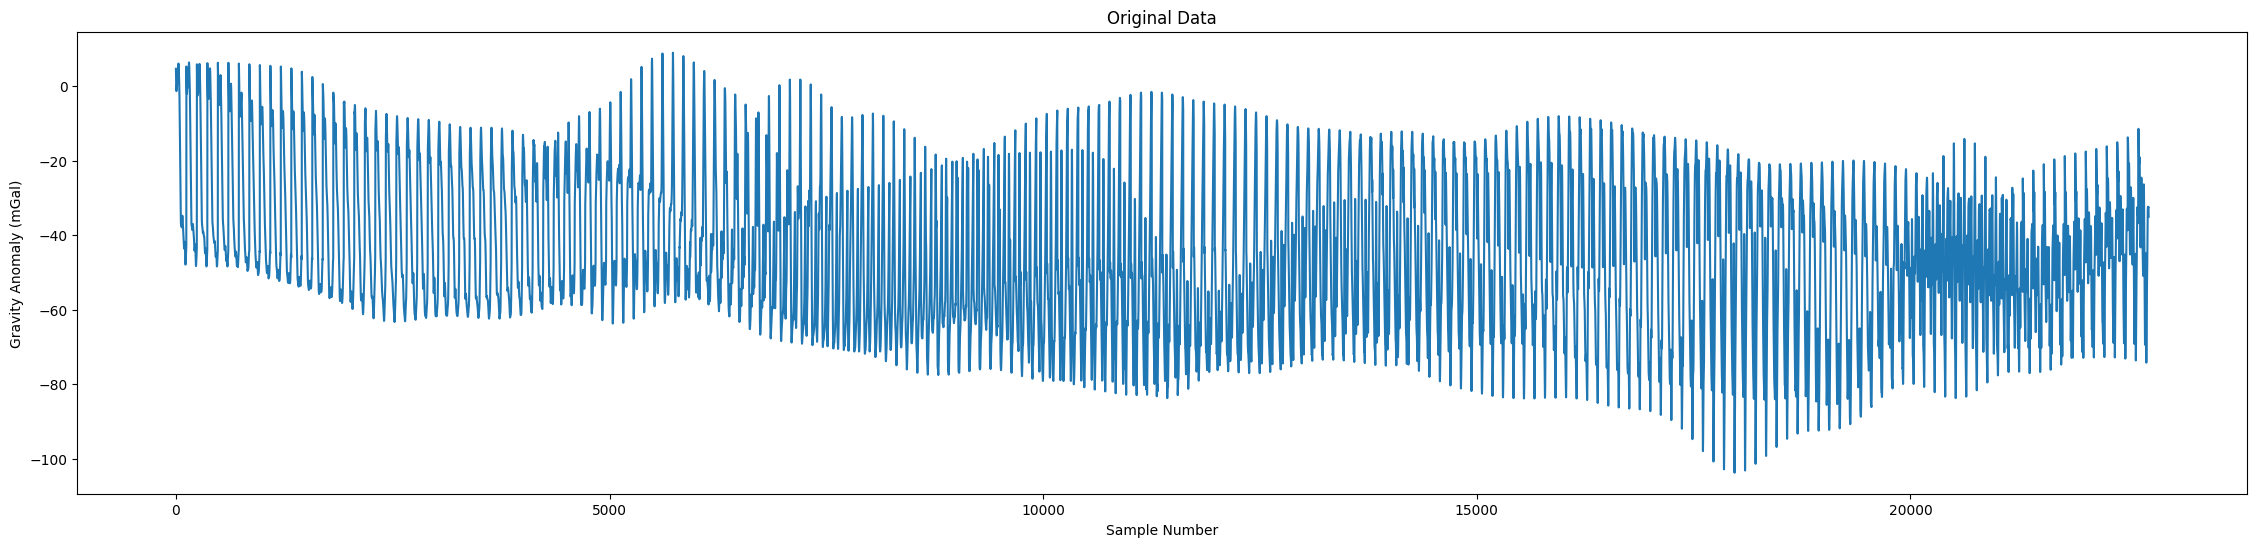

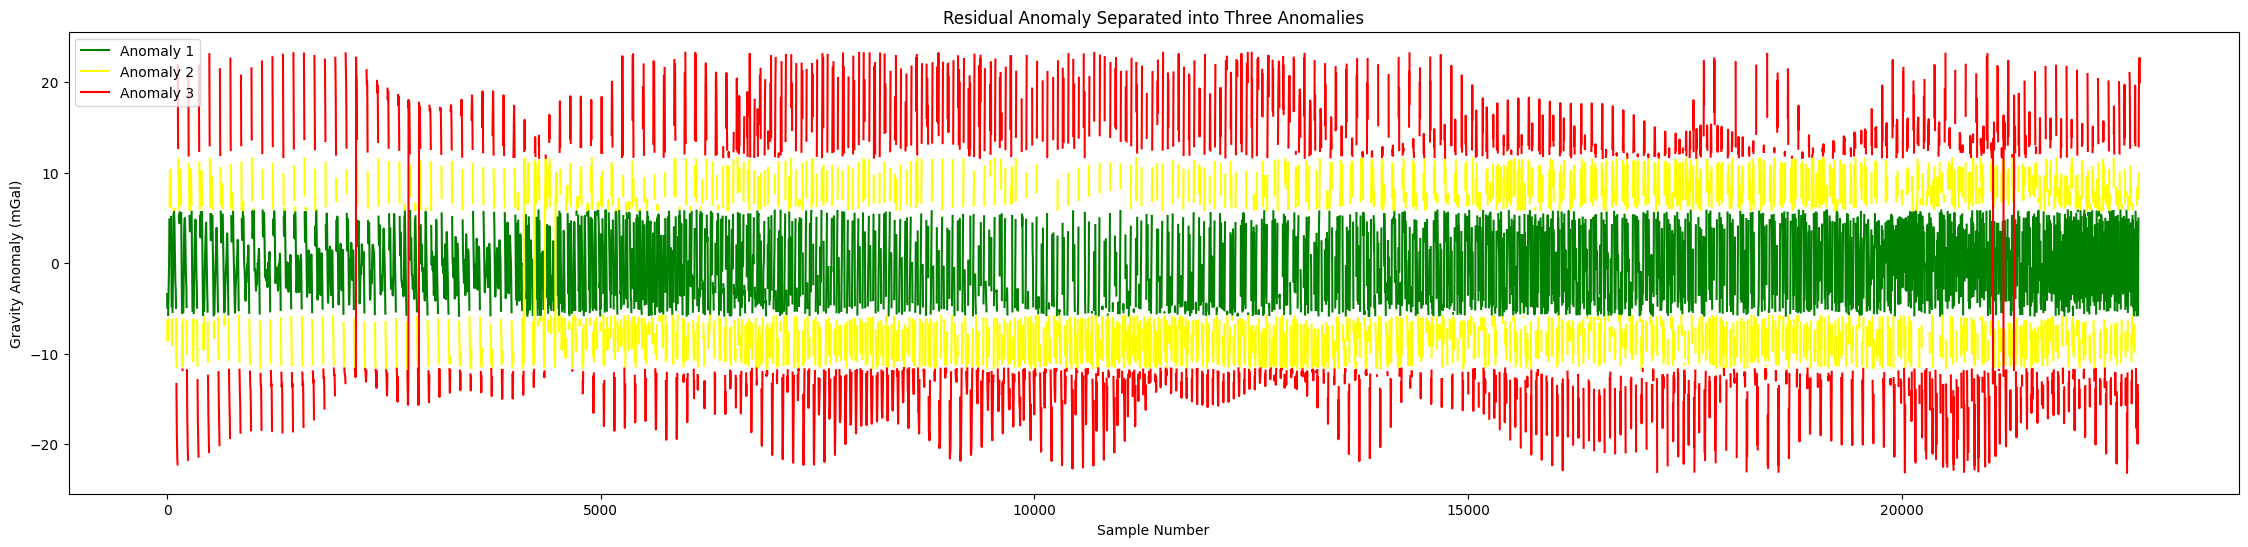

In [10]:
# Plot the original data
plt.figure(figsize=(28, 6))
plt.plot(df.index, data)
plt.title('Original Data')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

# Plot the residual anomalies separately
plt.figure(figsize=(28, 6))
plt.plot(df.index, anomaly1, label='Anomaly 1', color='green')
plt.plot(df.index, anomaly2, label='Anomaly 2', color='yellow')
plt.plot(df.index, anomaly3, label='Anomaly 3', color='red')
plt.legend()
plt.title('Residual Anomaly Separated into Three Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()


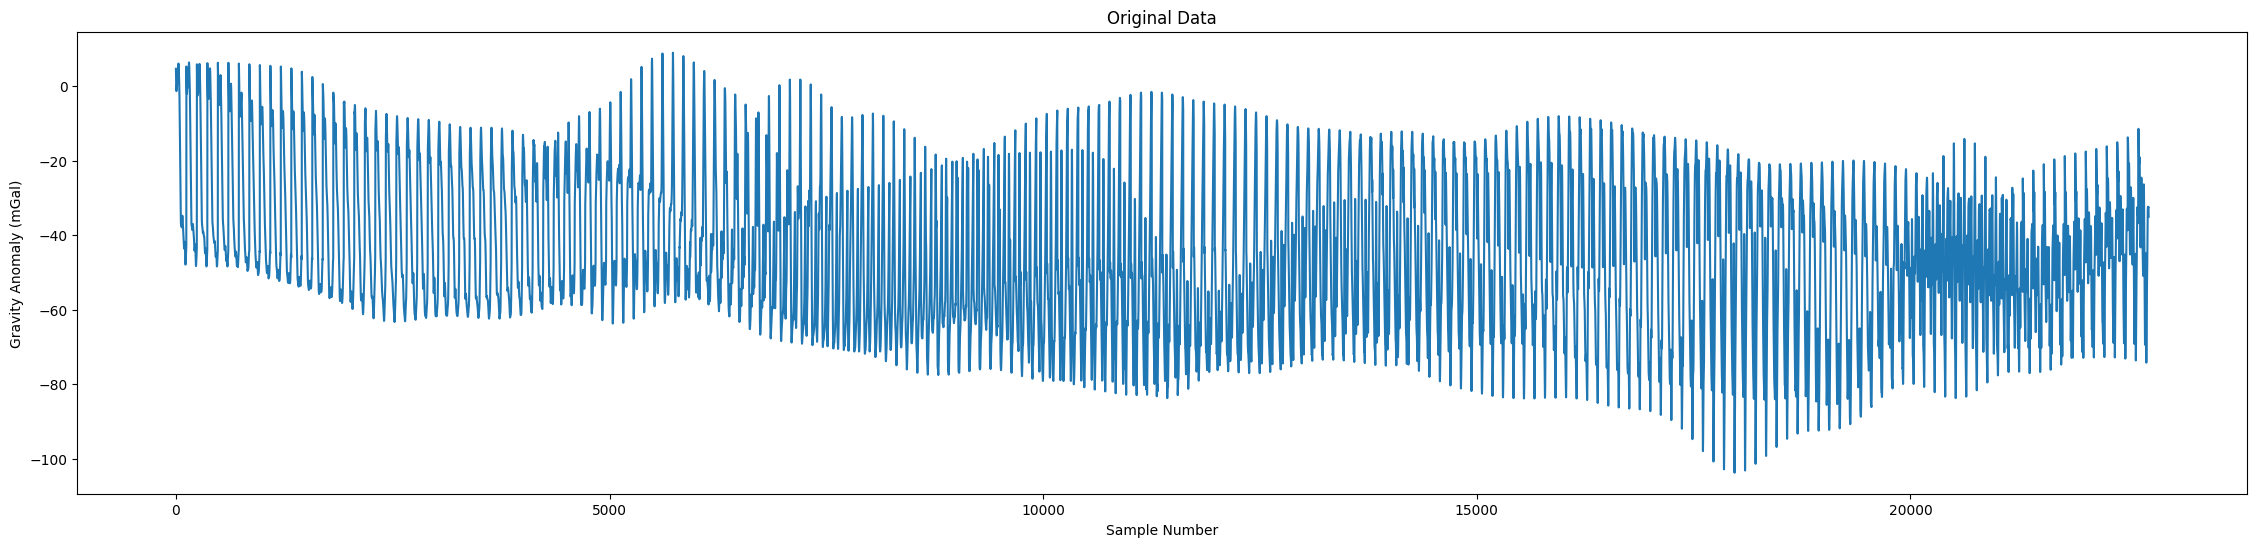

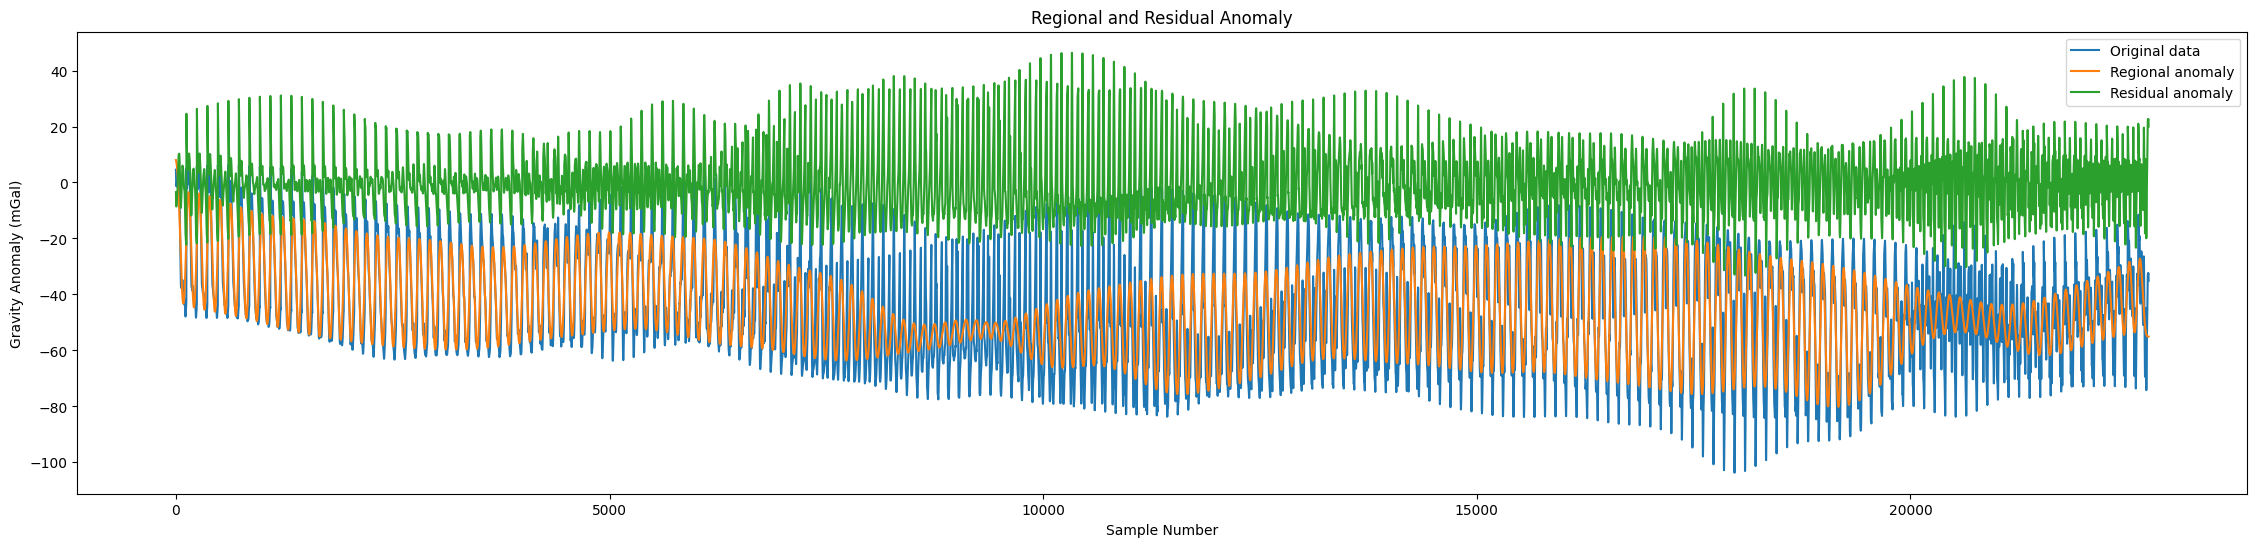

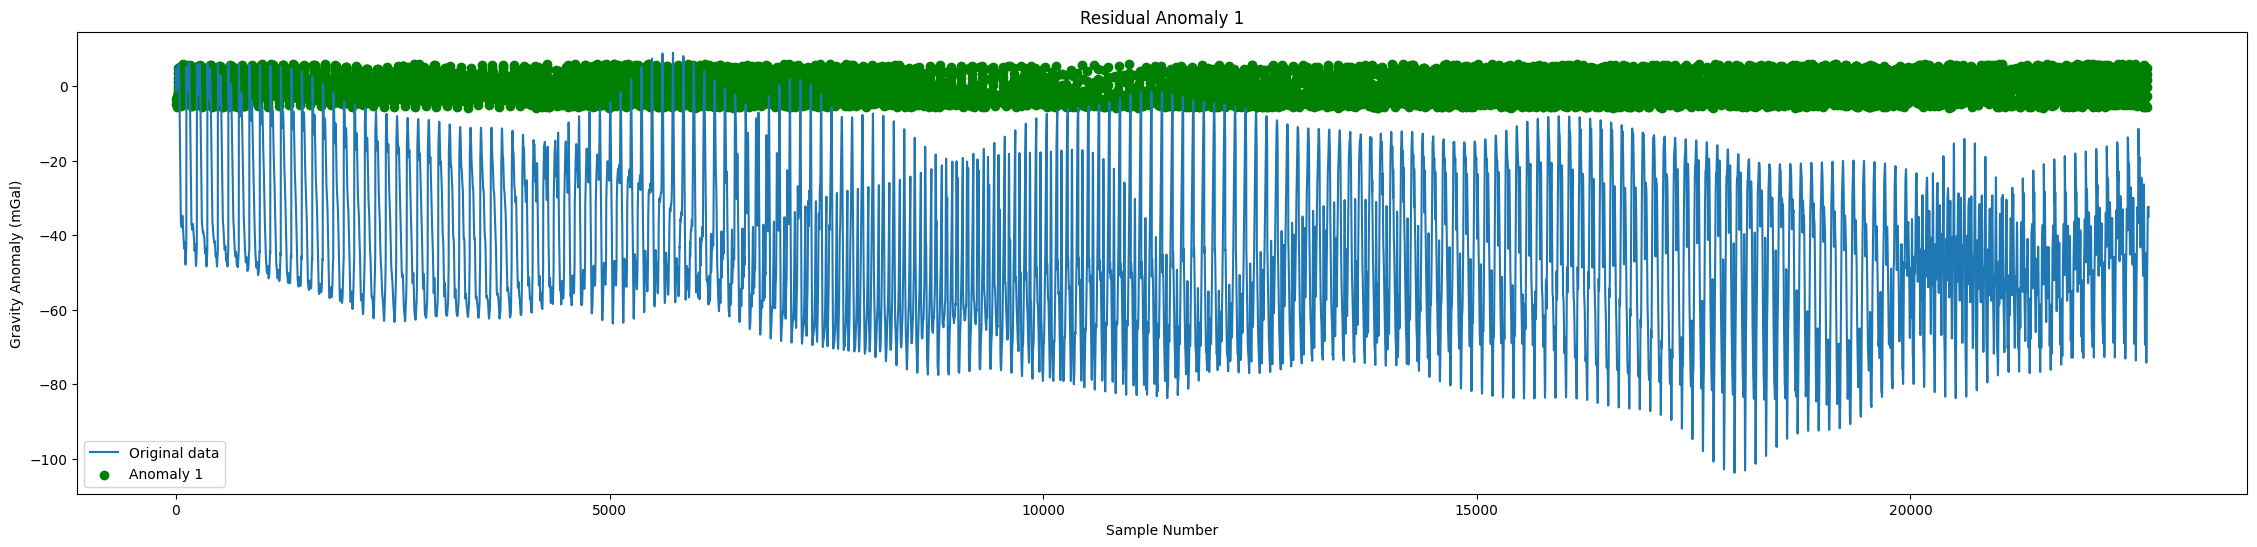

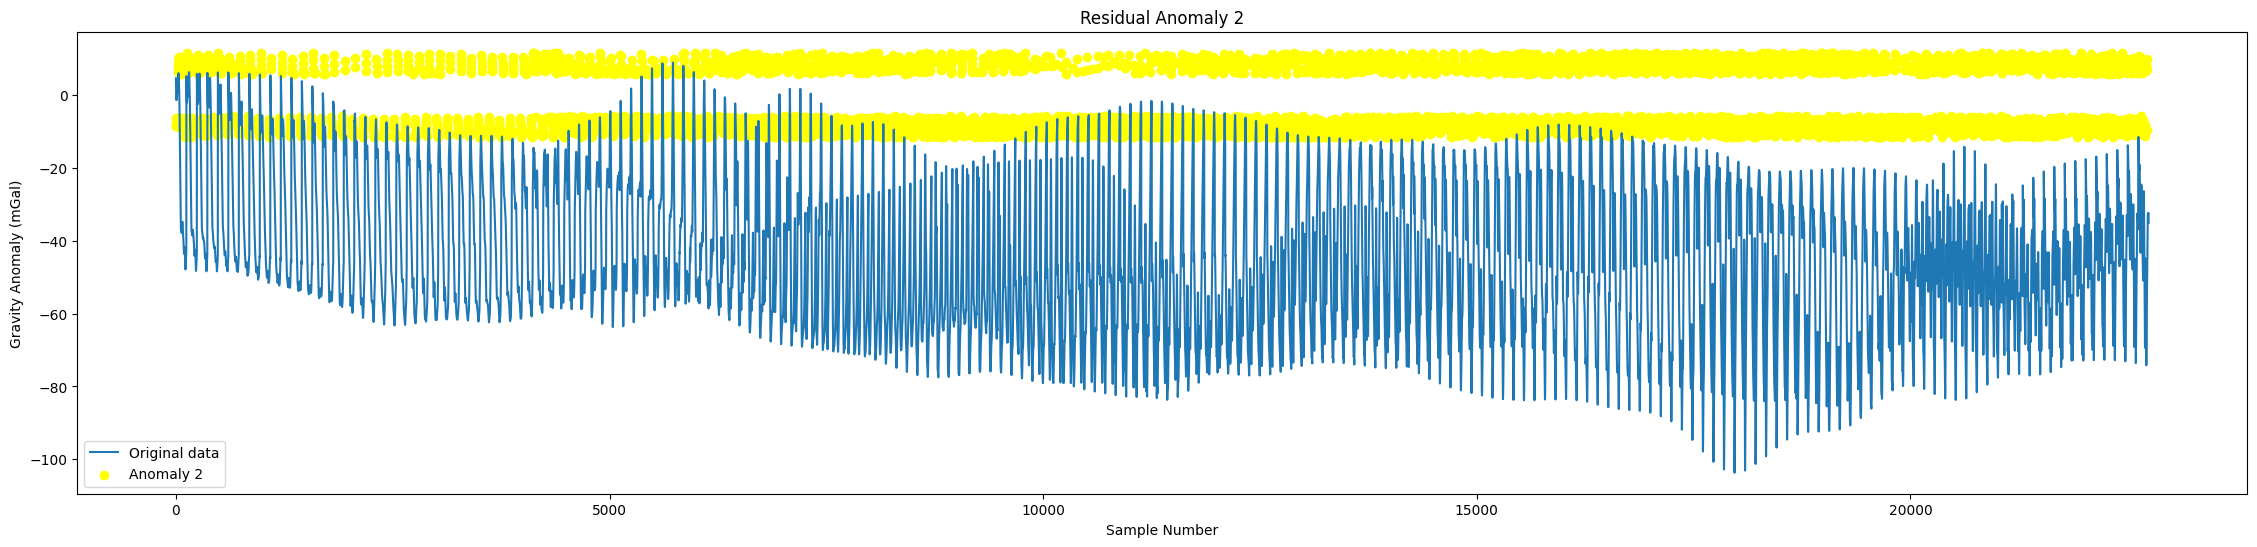

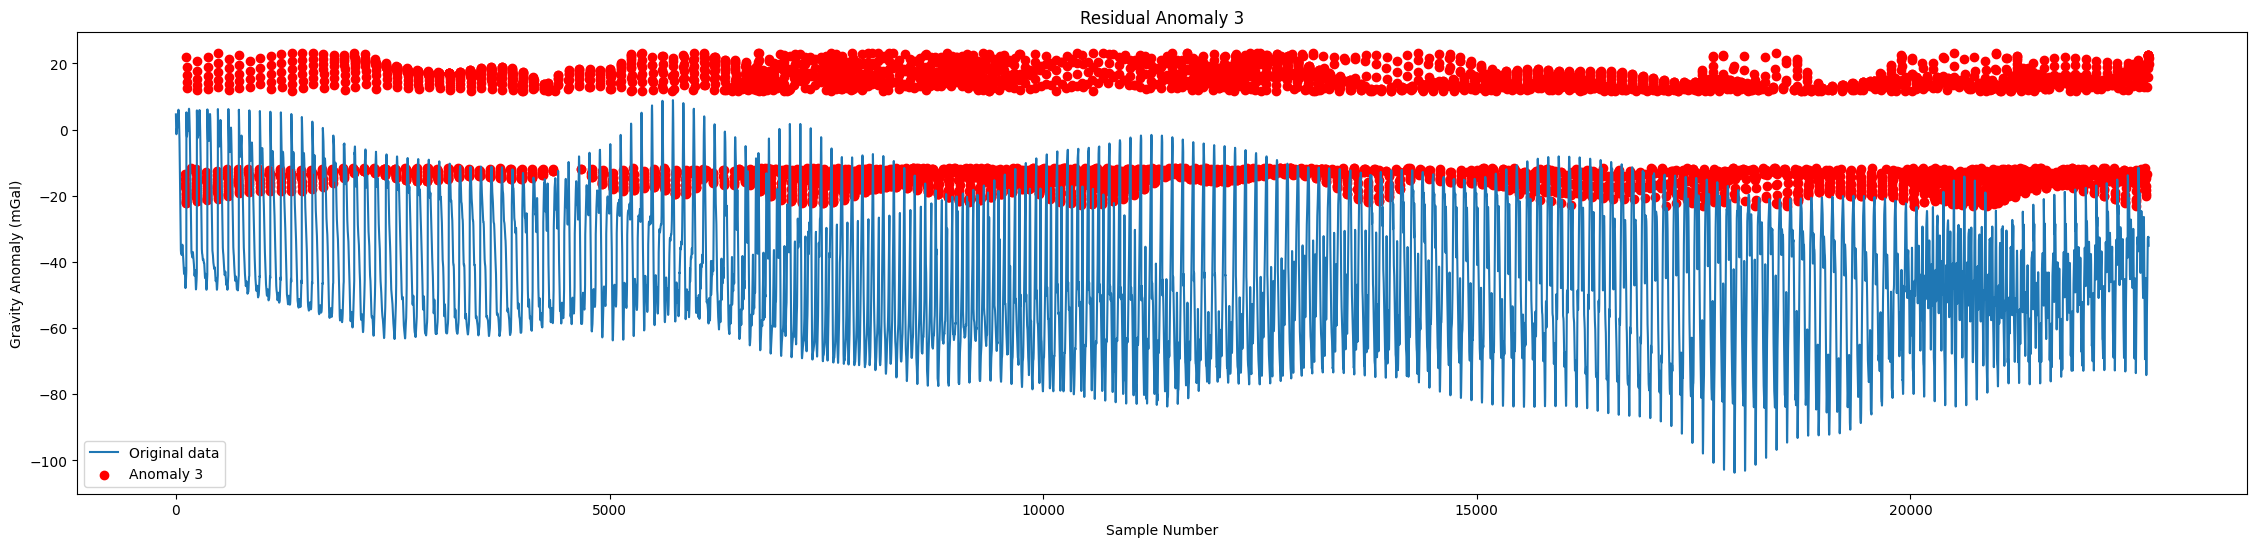

In [11]:
# Define three thresholds for the residual anomaly
threshold1 = residual_anomaly.std() / 2
threshold2 = residual_anomaly.std()
threshold3 = residual_anomaly.std() * 2

# Create three masks based on the thresholds
mask1 = (residual_anomaly >= -threshold1) & (residual_anomaly < threshold1)
mask2 = (residual_anomaly >= -threshold2) & (residual_anomaly < -threshold1) | \
        (residual_anomaly >= threshold1) & (residual_anomaly < threshold2)
mask3 = (residual_anomaly >= -threshold3) & (residual_anomaly < -threshold2) | \
        (residual_anomaly >= threshold2) & (residual_anomaly < threshold3)

# Create three separate arrays for the three anomalies
anomaly1 = np.where(mask1, residual_anomaly, np.nan)
anomaly2 = np.where(mask2, residual_anomaly, np.nan)
anomaly3 = np.where(mask3, residual_anomaly, np.nan)

# Plot the original data
plt.figure(figsize=(28, 6))
plt.plot(df.index, data)
plt.title('Original Data')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

# Plot the regional and residual anomalies
plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.plot(df.index, regional_anomaly, label='Regional anomaly')
plt.plot(df.index, residual_anomaly, label='Residual anomaly')
plt.legend()
plt.title('Regional and Residual Anomaly')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

# Plot the three residual anomalies separately
plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.scatter(df.index, anomaly1, label='Anomaly 1', color='green')
plt.legend()
plt.title('Residual Anomaly 1')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.scatter(df.index, anomaly2, label='Anomaly 2', color='yellow')
plt.legend()
plt.title('Residual Anomaly 2')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.scatter(df.index, anomaly3, label='Anomaly 3', color='red')
plt.legend()
plt.title('Residual Anomaly 3')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()


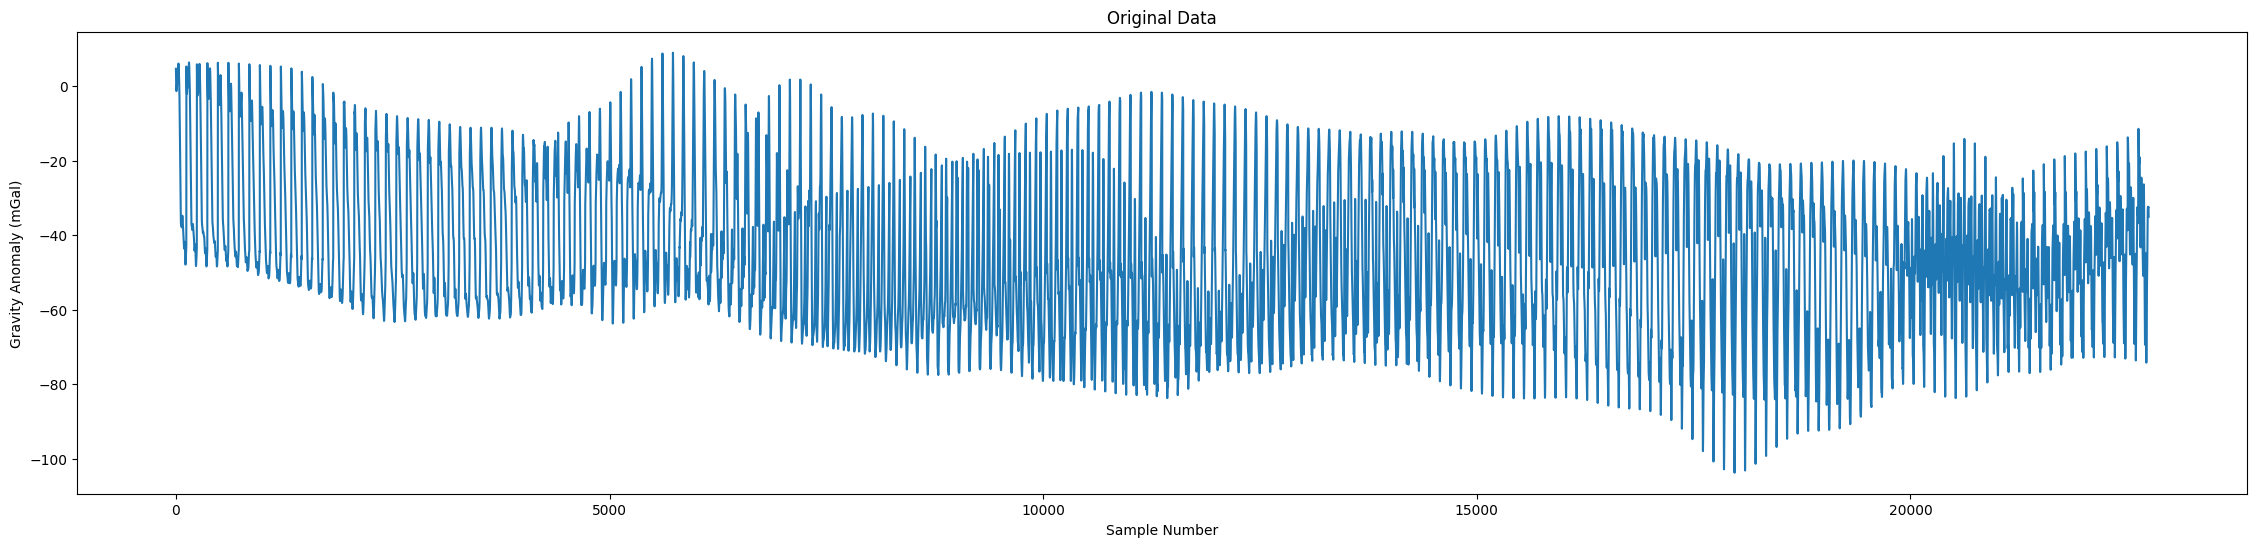

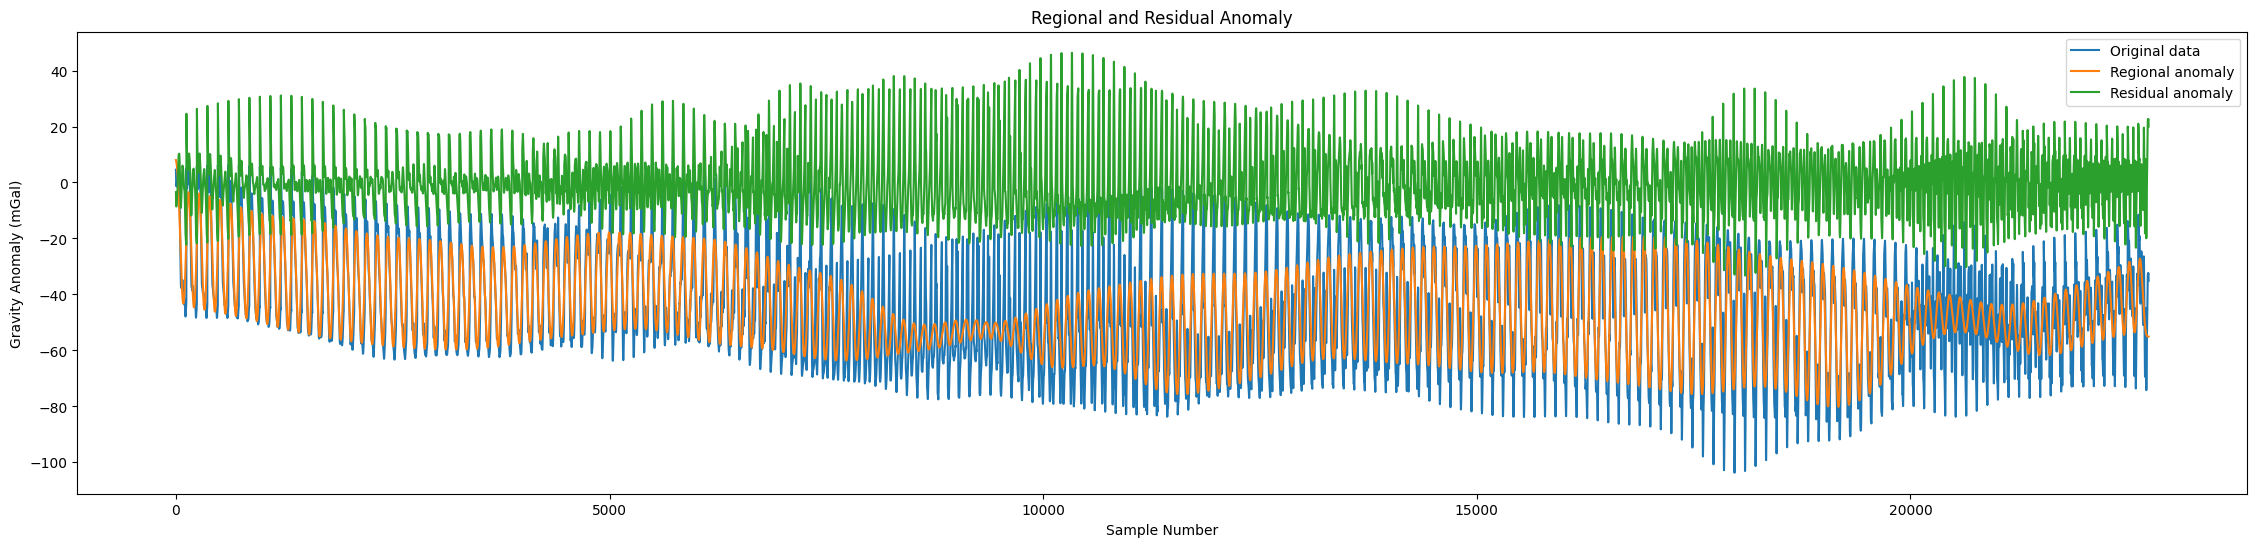

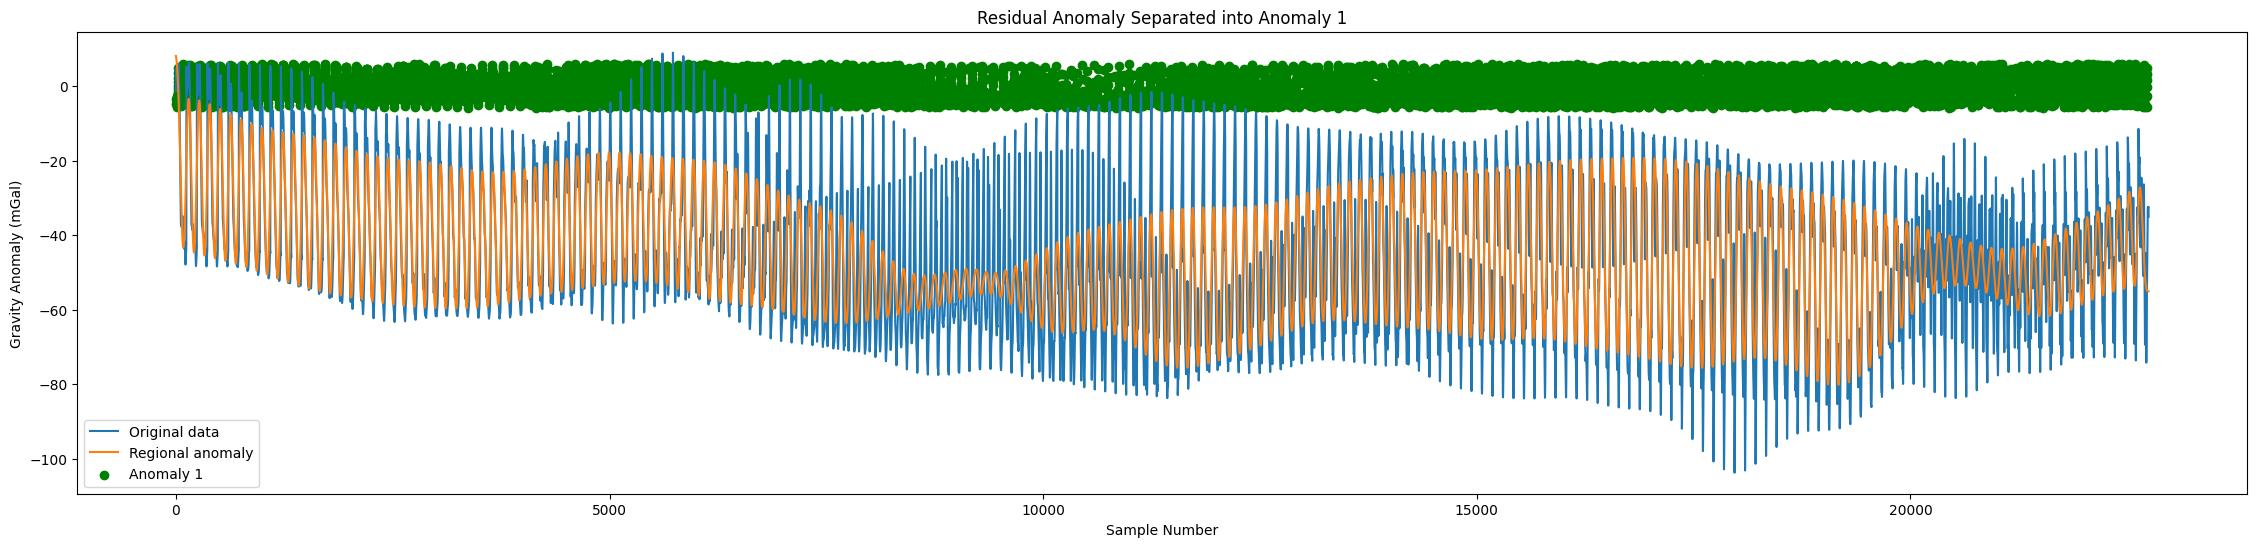

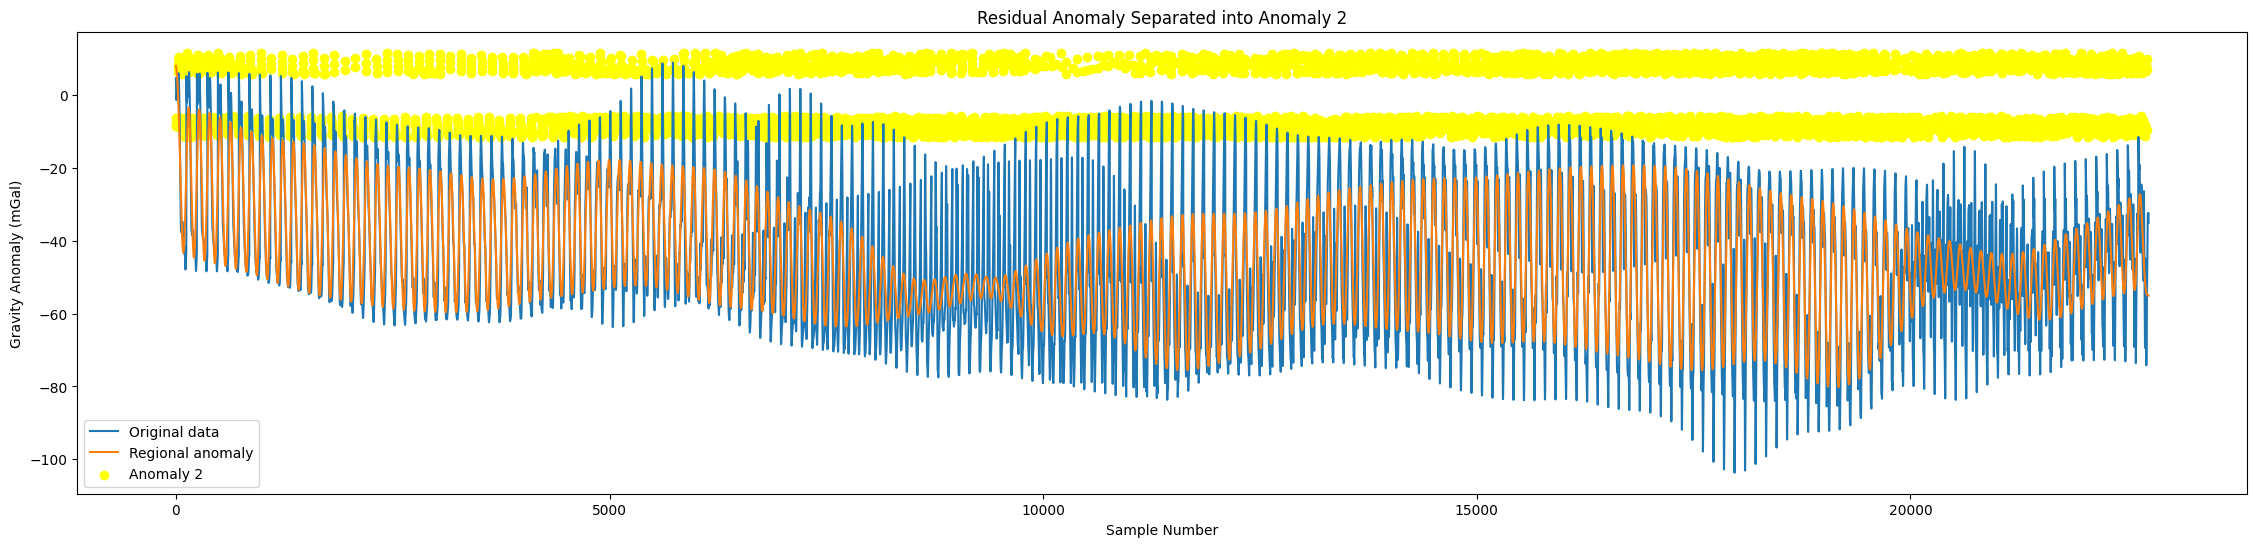

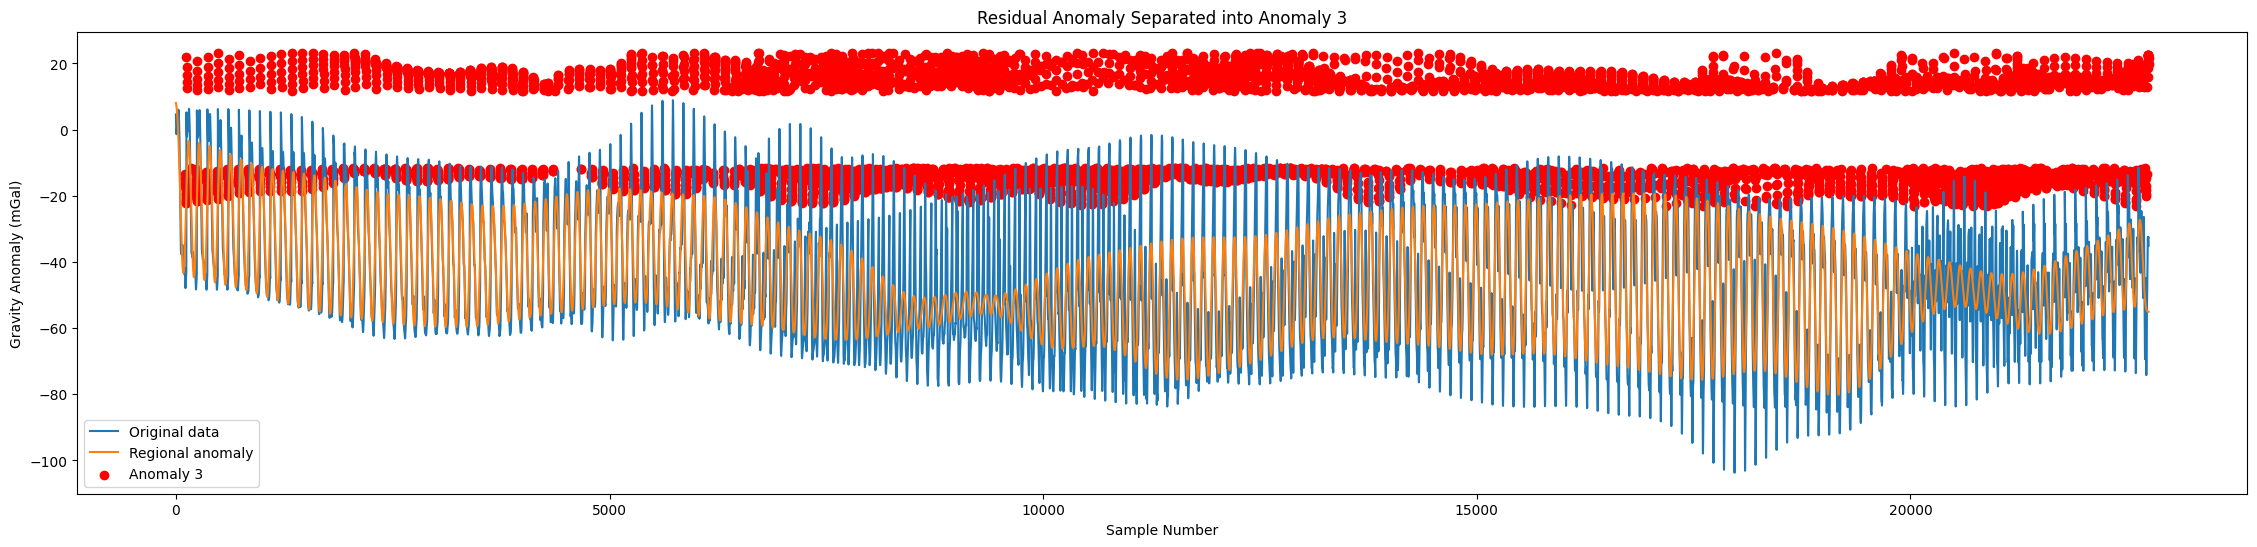

In [12]:
# Define three thresholds for the residual anomaly
threshold1 = residual_anomaly.std() / 2
threshold2 = residual_anomaly.std()
threshold3 = residual_anomaly.std() * 2

# Create three masks based on the thresholds
mask1 = (residual_anomaly >= -threshold1) & (residual_anomaly < threshold1)
mask2 = (residual_anomaly >= -threshold2) & (residual_anomaly < -threshold1) | \
        (residual_anomaly >= threshold1) & (residual_anomaly < threshold2)
mask3 = (residual_anomaly >= -threshold3) & (residual_anomaly < -threshold2) | \
        (residual_anomaly >= threshold2) & (residual_anomaly < threshold3)

# Create three separate arrays for the three anomalies
anomaly1 = np.where(mask1, residual_anomaly, np.nan)
anomaly2 = np.where(mask2, residual_anomaly, np.nan)
anomaly3 = np.where(mask3, residual_anomaly, np.nan)

# Plot the original data
plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.title('Original Data')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

# Plot the regional and residual anomalies
plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.plot(df.index, regional_anomaly, label='Regional anomaly')
plt.plot(df.index, residual_anomaly, label='Residual anomaly')
plt.legend()
plt.title('Regional and Residual Anomaly')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

# Plot the three anomalies with different colors
plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.plot(df.index, regional_anomaly, label='Regional anomaly')
plt.scatter(df.index, anomaly1, label='Anomaly 1', color='green')
plt.legend()
plt.title('Residual Anomaly Separated into Anomaly 1')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.plot(df.index, regional_anomaly, label='Regional anomaly')
plt.scatter(df.index, anomaly2, label='Anomaly 2', color='yellow')
plt.legend()
plt.title('Residual Anomaly Separated into Anomaly 2')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.plot(df.index, regional_anomaly, label='Regional anomaly')
plt.scatter(df.index, anomaly3, label='Anomaly 3', color='red')
plt.legend()
plt.title('Residual Anomaly Separated into Anomaly 3')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()


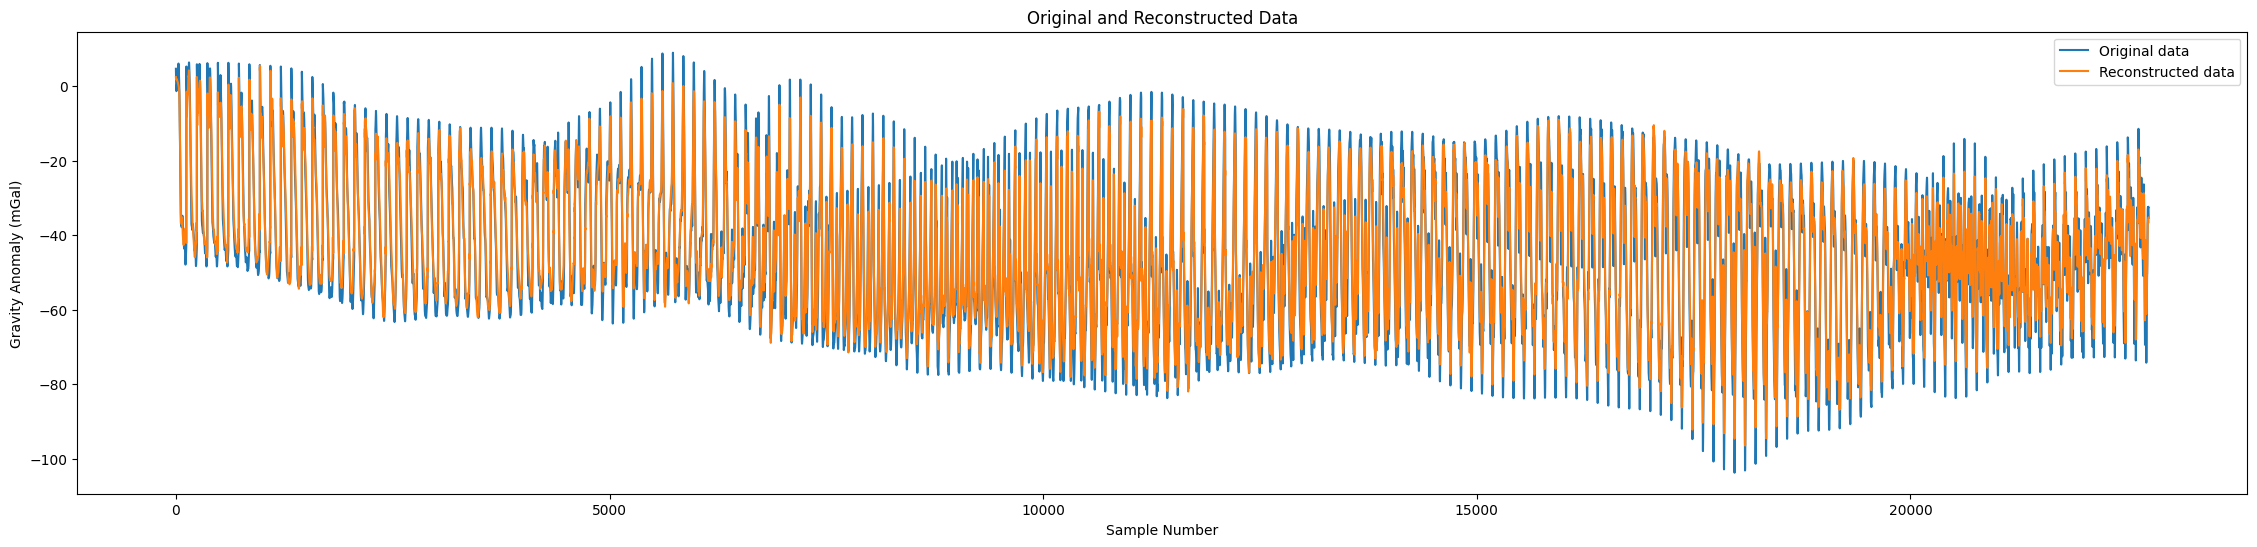

In [13]:
import pywt
import numpy as np

# Define the wavelet and level of decomposition
wavelet = 'db4'
level = 6

# Perform the wavelet decomposition
coeffs = pywt.wavedec(data, wavelet, level=level)

# Set a threshold value for the coefficients
threshold = 0.1

# Threshold the coefficients
thresholded_coeffs = [pywt.threshold(coeff, threshold*max(coeff)) for coeff in coeffs]

# Reconstruct the signal using the thresholded coefficients
reconstructed_data = pywt.waverec(thresholded_coeffs, wavelet)

# Plot the original and reconstructed data for comparison
plt.figure(figsize=(28, 6))
plt.plot(data, label='Original data')
plt.plot(reconstructed_data, label='Reconstructed data')
plt.legend()
plt.title('Original and Reconstructed Data')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()


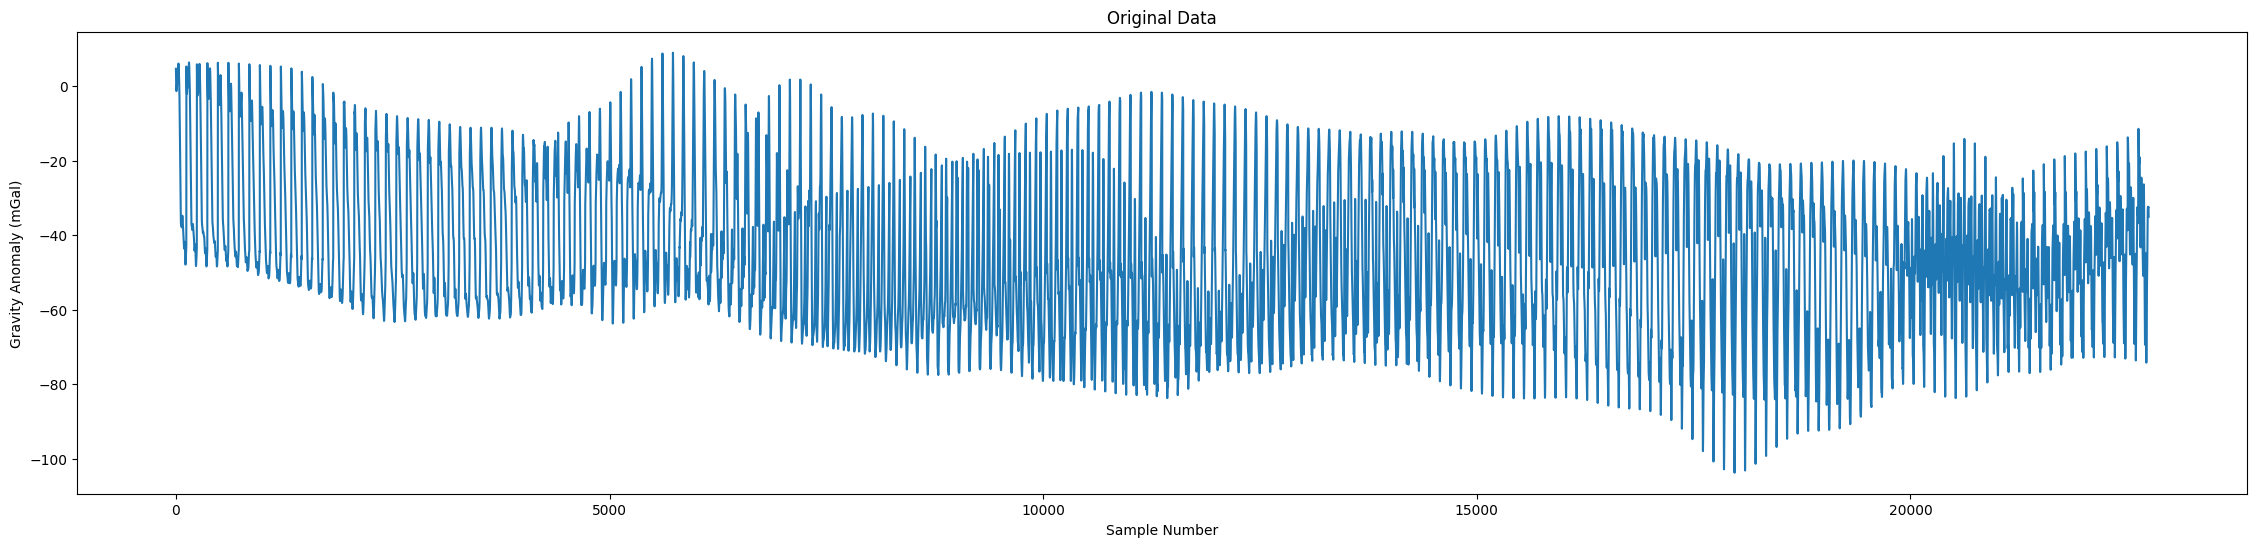

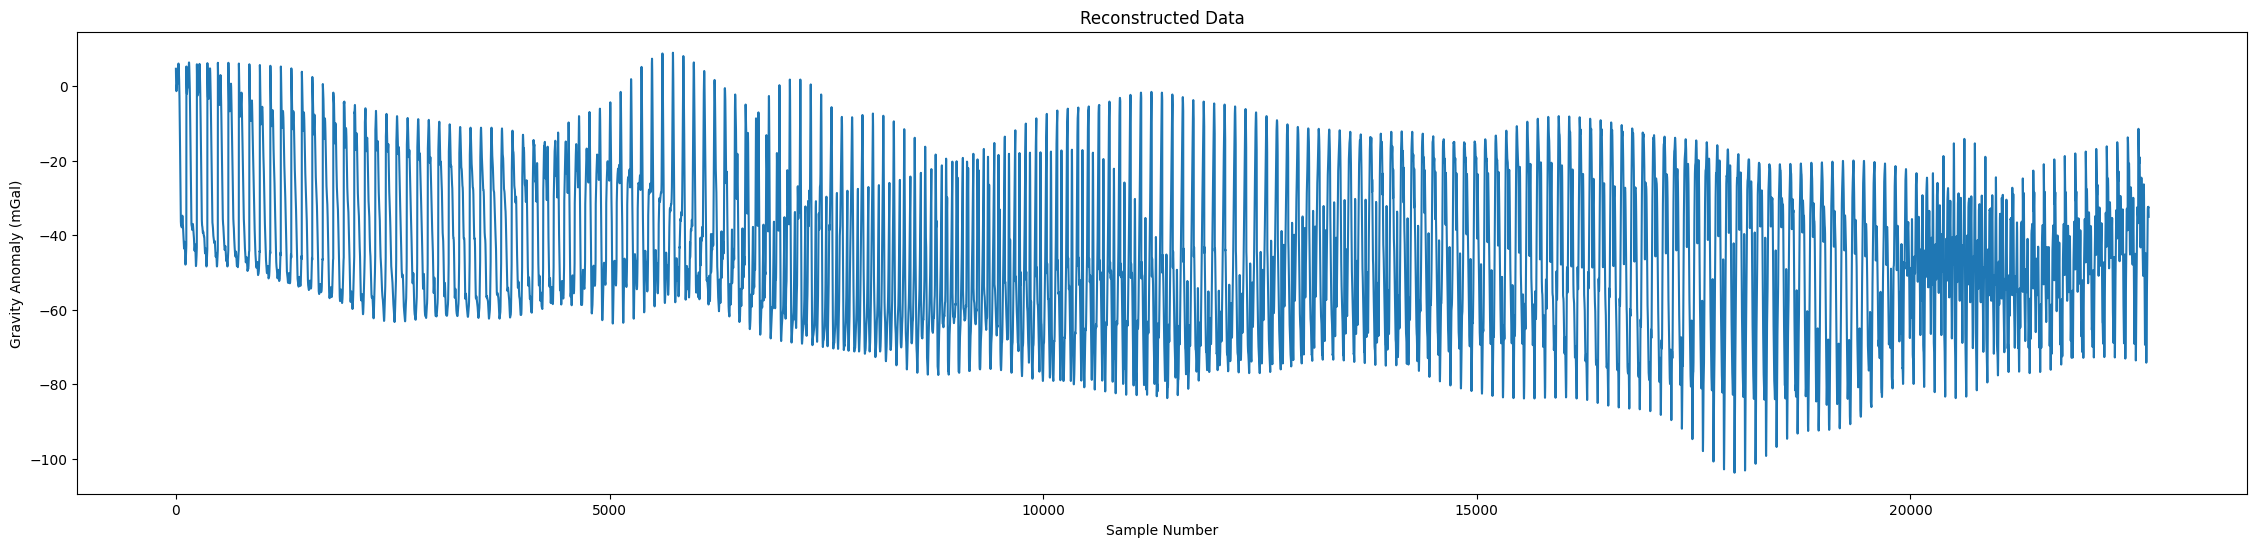

In [14]:
# Plot the original data
plt.figure(figsize=(28, 6))
plt.plot(data)
plt.title('Original Data')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

# Perform the DWT on the data and reconstruct it
coeffs = pywt.wavedec(data, wavelet='db4', level=3)
reconstructed_data = pywt.waverec(coeffs, wavelet='db4')

# Plot the reconstructed data
plt.figure(figsize=(28, 6))
plt.plot(reconstructed_data)
plt.title('Reconstructed Data')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()


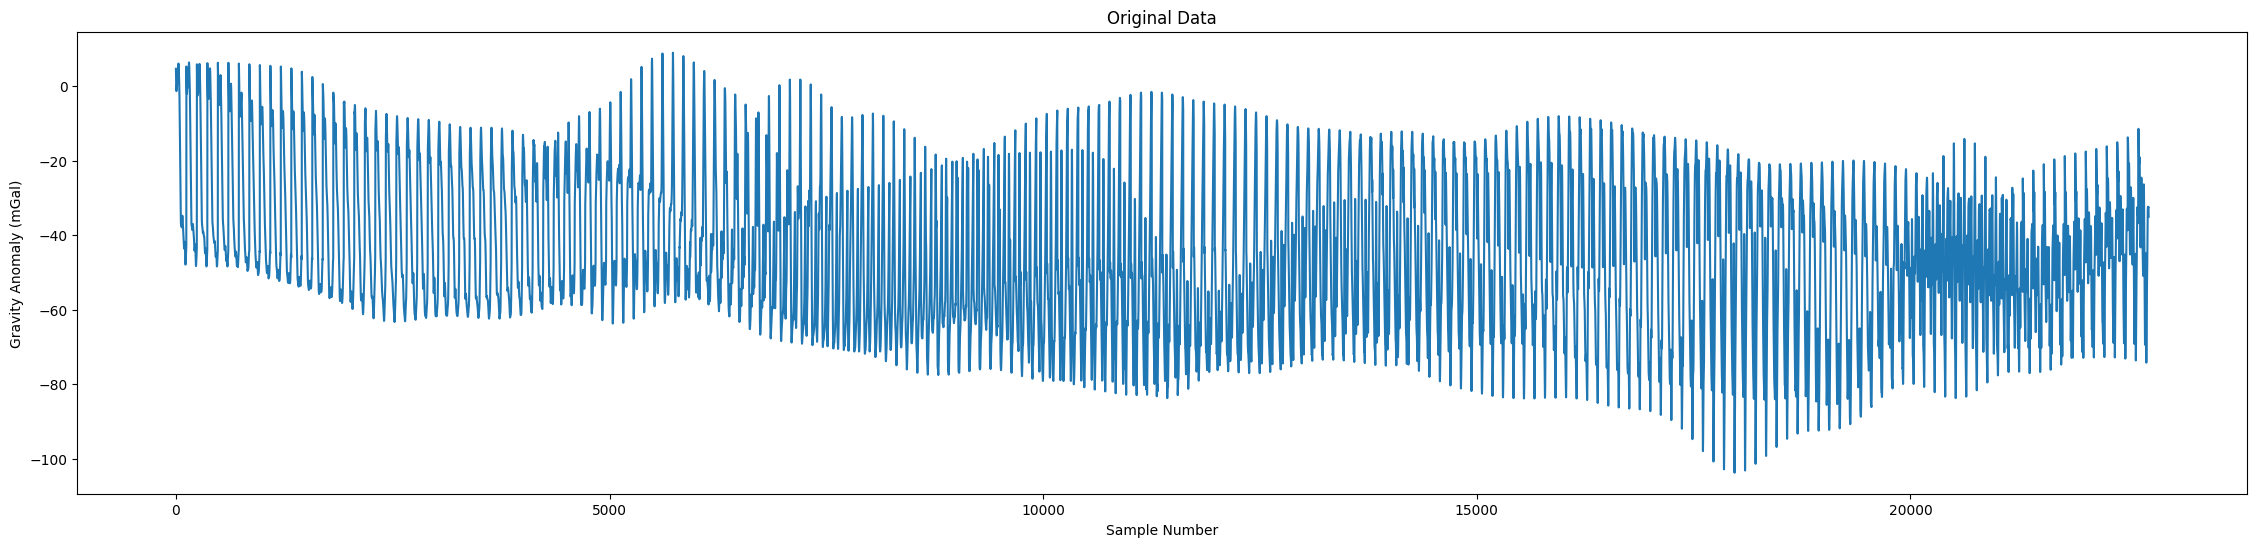

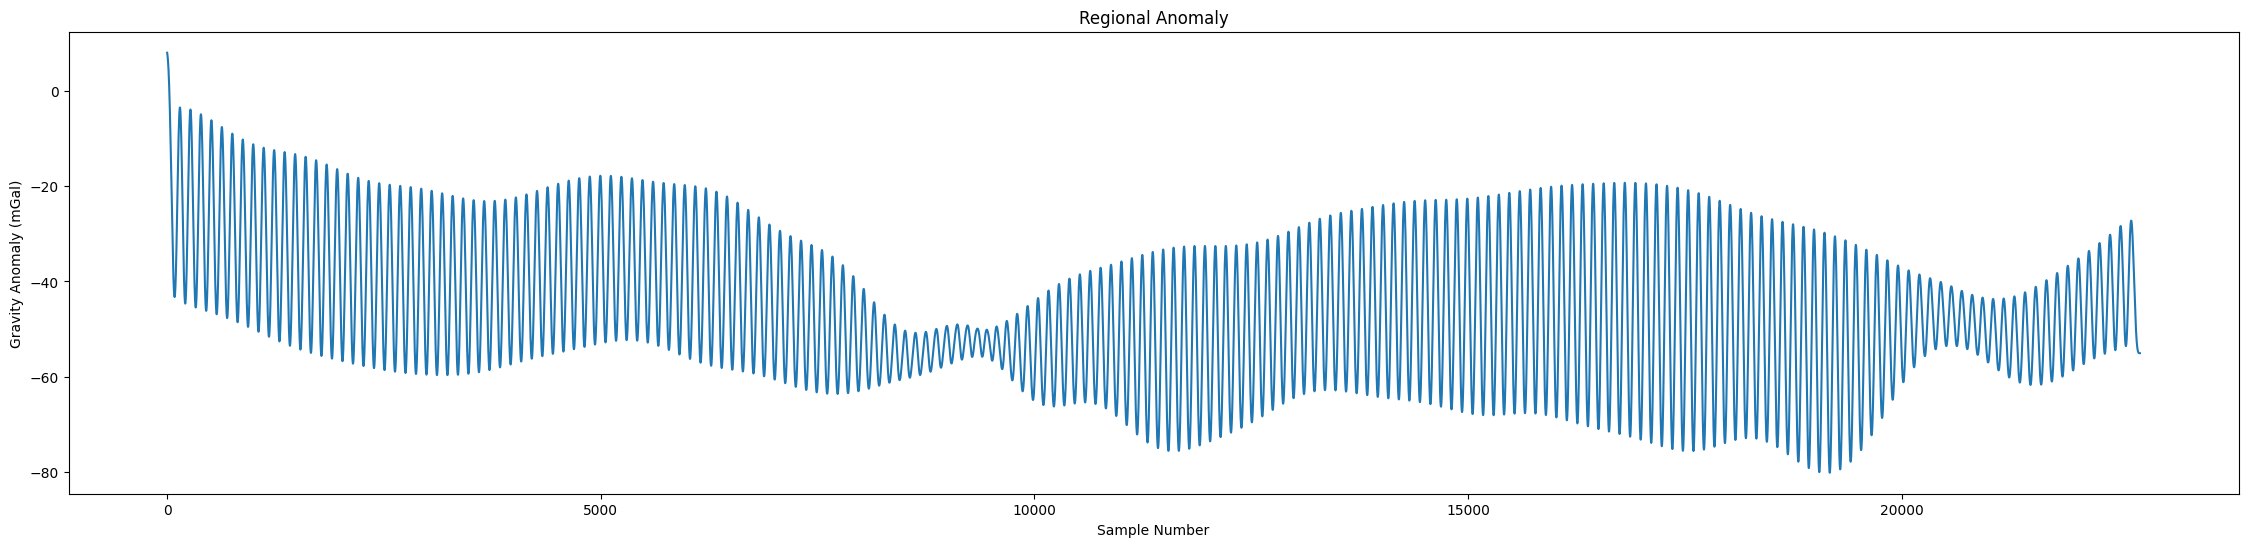

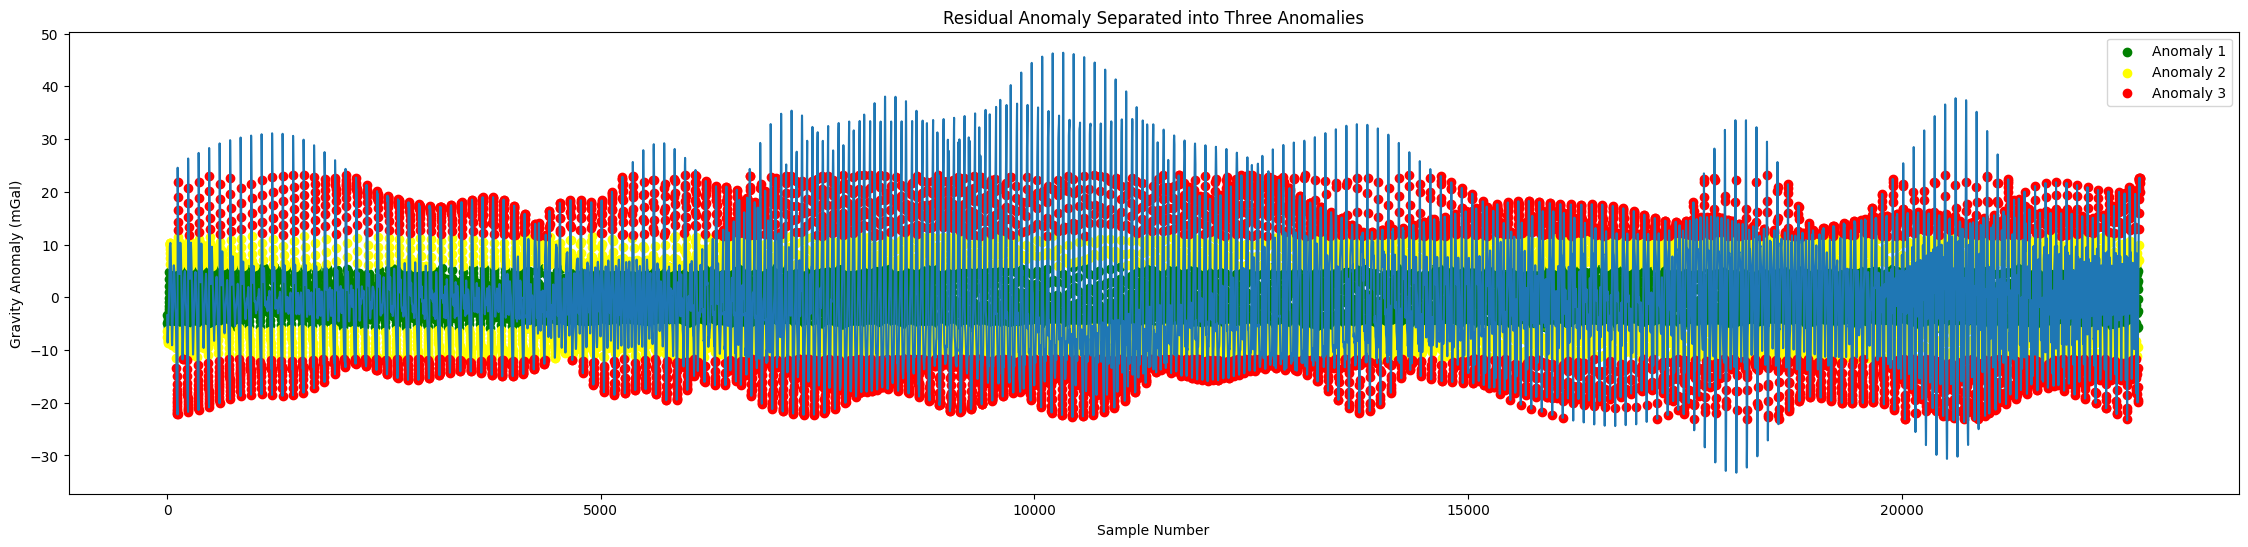

In [15]:
# Plot the original data
plt.figure(figsize=(28, 6))
plt.plot(df.index, data)
plt.title('Original Data')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

# Plot the regional anomaly
plt.figure(figsize=(28, 6))
plt.plot(df.index, regional_anomaly)
plt.title('Regional Anomaly')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

# Define three thresholds for the residual anomaly
threshold1 = residual_anomaly.std() / 2
threshold2 = residual_anomaly.std()
threshold3 = residual_anomaly.std() * 2

# Create three masks based on the thresholds
mask1 = (residual_anomaly >= -threshold1) & (residual_anomaly < threshold1)
mask2 = (residual_anomaly >= -threshold2) & (residual_anomaly < -threshold1) | \
        (residual_anomaly >= threshold1) & (residual_anomaly < threshold2)
mask3 = (residual_anomaly >= -threshold3) & (residual_anomaly < -threshold2) | \
        (residual_anomaly >= threshold2) & (residual_anomaly < threshold3)

# Create three separate arrays for the three anomalies
anomaly1 = np.where(mask1, residual_anomaly, np.nan)
anomaly2 = np.where(mask2, residual_anomaly, np.nan)
anomaly3 = np.where(mask3, residual_anomaly, np.nan)

# Plot the three anomalies with different colors
plt.figure(figsize=(28, 6))
plt.plot(df.index, residual_anomaly)
plt.scatter(df.index, anomaly1, label='Anomaly 1', color='green')
plt.scatter(df.index, anomaly2, label='Anomaly 2', color='yellow')
plt.scatter(df.index, anomaly3, label='Anomaly 3', color='red')
plt.title('Residual Anomaly Separated into Three Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.legend()
plt.show()
